# Linear Regression Using diabetes dataset 

Mean Squared Error: 2900.193628493482
R-squared Score: 0.4526027629719195


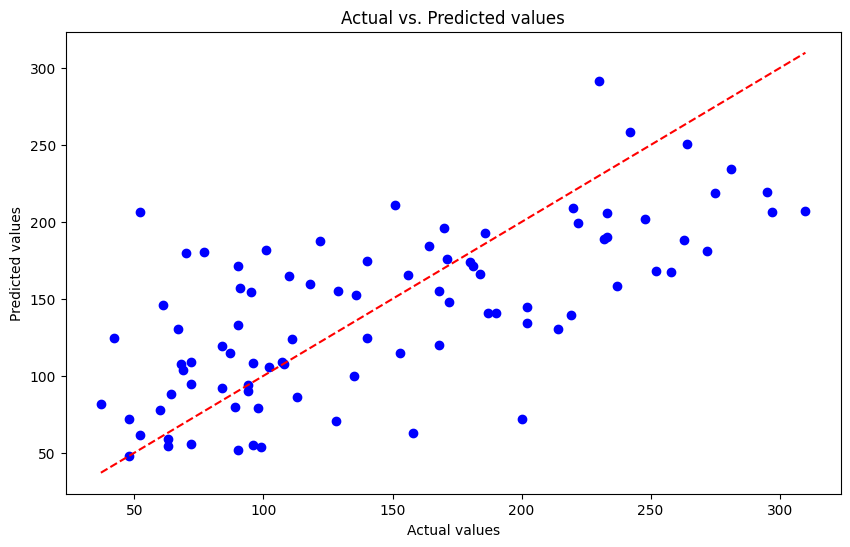

In [4]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Split the data into features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()


Choice of Linear Regression: Linear regression is chosen because it's a simple and interpretable model, suitable for predicting continuous outcomes like the diabetes dataset's target variable (quantitative measure of disease progression). Moreover, it's a good starting point for regression tasks and provides a baseline model for comparison with more complex algorithms.
Model Accuracy: Model accuracy is evaluated using Mean Squared Error (MSE) and R-squared score. MSE measures the average squared difference between the actual and predicted values, while R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
Plotting Results: The scatter plot shows the relationship between actual and predicted values. A perfect model would result in all points lying on the diagonal line (y=x). The closer the points are to this line, the better the model's predictions align with the actual values.
If the model's accuracy is not satisfactory, it could be due to several reasons like inadequate feature selection, multicollinearity among features, or the linear assumption may not hold for the data. Further exploration and refinement of the model might be needed in such cases.

# Polynomial Regression Using diabetes dataset 

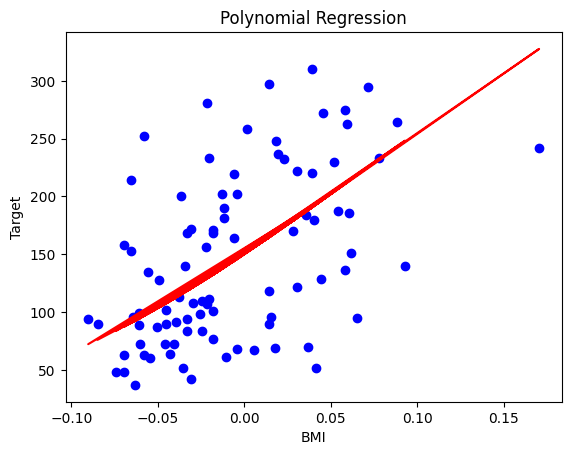

Mean Squared Error: 4064.4433837164365


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()

# Creating a DataFrame from the dataset
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                  columns= diabetes['feature_names'] + ['target'])

# Selecting a single feature for simplicity
X = df[['bmi']]
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and fitting the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred = poly_reg.predict(X_test_poly)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Plotting the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()

print("Mean Squared Error:", mse)


In this notebook, I chose to use polynomial regression because it can capture nonlinear relationships between features and the target variable. Polynomial regression extends linear regression by including polynomial features of the original variables, allowing for more flexible modeling.

The code first loads the diabetes dataset from Scikit-learn. Then, it selects a single feature ('bmi') and splits the data into training and testing sets. Next, it transforms the feature into polynomial features of degree 3. After that, it creates and fits a polynomial regression model using the transformed features. Finally, it evaluates the model's performance by calculating the Mean Squared Error and visualizes the results by plotting the predicted values against the true values.